In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('datasets/Social_Network_Ads.csv')
print(dataset)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

scalerX = StandardScaler()
X_train_scaled = scalerX.fit_transform(X_train)
X_test_scaled = scalerX.transform(X_test)

print('done')

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]
done


In [2]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [3]:
from numpy.testing import assert_allclose
single_test = X_test_scaled[0].reshape(1, -1)
prediction1 = classifier.predict(single_test)

actual1 = y_test[0]
assert_allclose(prediction1, actual1)

In [4]:
# checking how many predictions are wrong

predictions = classifier.predict(X_test_scaled)
diff = (y_test != predictions)
accuracy_ratio = round(1 - (diff.sum()/len(y_test)), 3)

print(accuracy_ratio)


0.9


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix = confusion_matrix(y_test, predictions)
acsc = accuracy_score(y_test, predictions)

print()

/var/folders/yn/w_mvcjjs6735x0cjhqkzkgnw0000gn/T/ipykernel_76797/3619533323.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


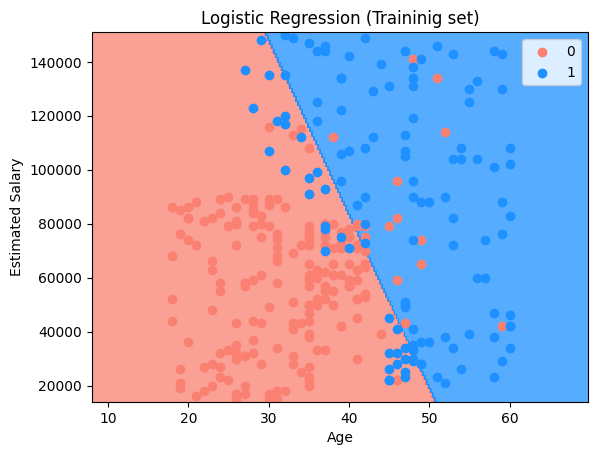

/var/folders/yn/w_mvcjjs6735x0cjhqkzkgnw0000gn/T/ipykernel_76797/3619533323.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


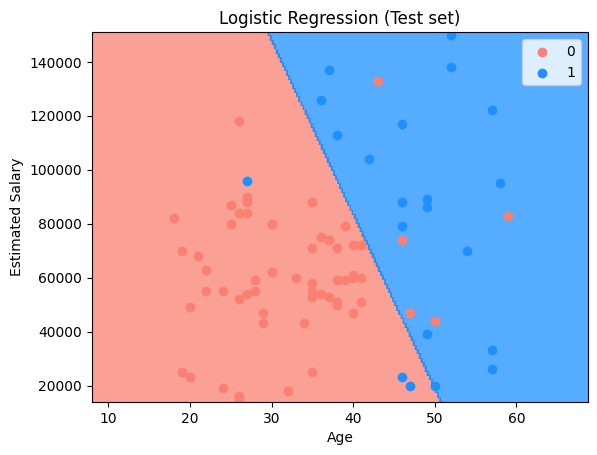

In [8]:
# Training set visualization

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plotMeshgrid(X_set, y_set, title: str):
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                    np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
  X_flattened = np.array([X1.ravel(), X2.ravel()]).T
  predicted = classifier.predict(scalerX.transform(X_flattened)).reshape(X1.shape)

  plt.contourf(X1, X2, predicted,
            alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
      plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
              c = ListedColormap(('salmon', 'dodgerblue'))(i), 
              label = j)

  plt.title(f'Logistic Regression ({title} set)')
  plt.xlabel('Age')
  plt.ylabel('Estimated Salary')
  plt.legend()
  plt.show()

plotMeshgrid(X_train, y_train, 'Traininig')
plotMeshgrid(X_test, y_test, 'Test')